In [1]:
import os
import cv2
import json
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from attrdict import AttrDict

In [10]:
class NfDataset(Dataset):
    def __init__(self, args, mode='train'):
        self.path_root = args.path_root
        self.mode = mode
        
        self.paths = []
        self.bg_dir = os.path.join(path_root, 'bg')
        self.index_dir = os.path.join(path_root, 'index_map.npy')  
        self.np = np.load(self.index_dir)
        
        def create_path_dict(trans_dir, path_root):
            ret_dict = {}
            with open(trans_dir, 'r') as f:
                trans_dict = json.loads(f.read())
            ret_dict['camera_angle_x'] = trans_dict['camera_angle_x']
            for idx, finfo in enumerate(trans_dict['frames']):
                finfo['file_path'] = os.path.join(path_root, finfo['file_path']+'.png')
                ret_dict[idx] = finfo
            return ret_dict

        if self.mode == 'train':
            trans_dir = os.path.join(path_root, 'transforms_train.json')
        elif self.mode == 'val':
            trans_dir = os.path.join(path_root, 'transforms_val.json')
        elif self.mode == 'test':
            trans_dir = os.path.join(path_root, 'transforms_test.json')

        else:
            raise NotImplementedError
        
        self.trans = create_path_dict(trans_dir, path_root)

    
    def __len__(self):
        return len(self.trans)
    
    def __getitem__(self, idx):
        img = cv2.imread(self.trans[idx]['file_path'])[...,::-1]
        img = np.ascontiguousarray(img, dtype=np.float32) / 255.
        bbox = [int(coor*args.imsize) for coor in self.trans[idx]['bbox']]
        img_bbox = img[bbox[0]:bbox[1],bbox[2]:bbox[3]]
        bbox = torch.FloatTensor(self.trans[idx]['bbox'])
        return self.trans[idx], img, img_bbox, bbox
        

<class 'torch.Tensor'>
torch.Size([1, 512, 512, 3])


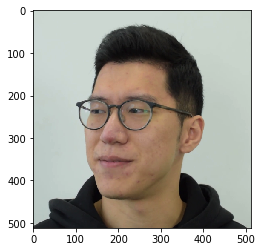

In [11]:
import matplotlib.pyplot as plt

path_root = '/DATA1/junha/dave_dvp'
args = AttrDict()
args.path_root = path_root
args.imsize = 512

dataset = NfDataset(args)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)


In [ ]:
for _dict, img, img_bbox,bbox in dataloader:
    print(type(img))
    print(img.shape)
    plt.imshow(img.numpy()[0])
    print(_dict.keys())
    break

torch.Size([1, 496, 370, 3])


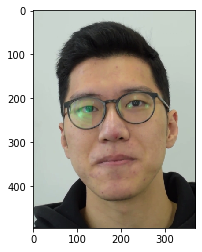

In [18]:
print(img_bbox.shape)
plt.imshow(img_bbox.numpy()[0])


In [36]:
bg_dir = '/DATA1/junha/dave_dvp/bg/'
prev = None
for i in range(126):
    name = f'{i+1:05}.png'
    path = os.path.join(bg_dir, name)
    img = cv2.imread(path) / 255.
    if i==0:
        prev = img
    
    print(np.any(prev != img))
    prev = img

'''
img = cv2.imread(bg_dir) / 255.

plt.imshow(img)
print(type(img))
'''

False
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


'\nimg = cv2.imread(bg_dir) / 255.\n\nplt.imshow(img)\nprint(type(img))\n'